# TensorFlow - Unit 05 - Fitting a TensorFlow Model

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Study considerations for your datasets (Train, Validation, Test Sets) when training TensorFlow models
* Understand how to model your network architecture
* Make sense of the data flow inside your deep neural network
* Understand the training hyperparameters



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import os;
import tensorflow as tf;
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2';
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Unit 05 - Fitting a TensorFlow Model

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Considerations when fitting your model

When we train a model in TensorFlow we should consider the following aspects
* Datasets: Train, Validation, Test Sets
* Model Architecture
* Data flow in a network
* Training Hyperparameters
* Evaluate in the Loss Plot if the model learned normally, overfitted or underfitted

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Train, Validation and Test Sets

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In conventional ML, we split the data into a train and test set. However, when using GridSearchCV for hyperparameter optimization, this function automatically subsetted a share of the Train set used as the validation set.
* Here, you shall have 3 distinct sets before the training process. You will parse the train and validation sets. Their usage is the same as in conventional ML, one is used to train the algorithm and the other to validate performance while the model is being trained. The test set is used after to evaluate the ability to generalize on unseen data
* In image datasets, you may have a situation where you may have a folder called Train and when training, you split part of it as a validation set. However, for simplification, in this course, either for tabular data and image data, we will have 3 distinct DataFrames (if data is tabular) or 3 distinct folders (if data is an image).

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Model Architecture

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Unfortunately, you can't know in advance what is the optimal model architecture (number of layers, number of neurons per layer, best optimizer or loss function, dropout level etc) that fits your data.
* It will be a trial and error approach. 
* However, there are some best practices you can consider  

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> The guidelines we will study below are applied to the following context
* In this course, we consider layers that will help us solve ML tasks (Regression and Classification) on tabular and image datasets. We present layers, such as the fully connected layer - `Dense()` - and convolution layer - `Conv2D()` - that helps us to solve these tasks

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A good practice is to start with a simple model at first and then keep improving. A baseline architecture will help to tell if the model is learning properly, underfitting or overfitting.
  * If the model is underfitting, you may add more network complexity, like adding layers, more neurons to the existing layer, 
  * If the model is overfitting, you may reduce the network complexity using Dropout, EarlyStopping.

* You may also try different activation functions in your network. Typically, a "first to go" option is ReLU, but you may consider another for your particular problem. That includes the optimizer and loss function when compiling the model. Popular choices for optimizers are Adam (typically the first to fo), SGD, and RMSProp.
  
<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> You may notice it will be more of a trial and error approach to find the best hyperparameter combination for your data.

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">  To define a baseline model architecture for **tabular data**, you may consider 
* The input layer would have the number of nodes as the number of features.
* The output layer will depend on the ML task. We covered in Unit 03 - Activation Function, Loss function, and Optimizer
* For the hidden layers, it is more like a set of refined guesses in terms of quantity of layers and quantity of neurons per layer
  * Quantity of layer: you may start with 2 hidden layers. Then evaluate your dataset complexity (you probably made an EDA already and know how complex your data is up to this point, like if it shows significant correlations between the features and the target etc.). If the data is complex, it may be worth adding a few more layers, so in theory, the network would learn the patterns. 
  * Neurons per layer: You may consider an "expansive-shrink" approach or "shrink" approach
    * "expansive-shrink": the number of neurons increases then decrease, for example, the input layer with 10 neurons, the hidden layer of 20 neurons, the hidden layer of 8, then the hidden layer of 2.
    * "shrink": input layer with 10 neurons, the hidden layer of 5, the hidden layer of 3, then the hidden layer of 2
    * the potential number of neurons you consider may follow like a geometric progression of 2, 4, 8, 16, 32. Again, it is just a refined guess, and you will refine that as you check the model performance.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">  To define a baseline model architecture for an **image dataset** you may consider you will typically use in conjunction Conv2D (select the relevant features - like shape, shadow, color etc. - from the image) and MaxPool2D (used for feature summarization while downsampling - reduces the image size by extracting only the dominant pixels within the pool size)
* Therefore, you may decide on how many pairs of these layers to use and reasonable values for filters and kernel size for Conv2D and pool size for MaxPool2D
* You may consider values for filters in Conv2D like multiples of two, like 16, 32, 64 etc
* Kernel sizes are typically 2x2, 3x3 or 4x4
* You may start your CNN with 1 or 2 pairs of Conv2D/MaxPool2D
* When arranging multiple pairs, you may increase the number of filters as long as you add pairs, like 16, 32, 64.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png">  Once again: these are just rough ideas and references on how to start approaching your design of the network.

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Data flow in a network

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Once you defined your model architecture, **you can understand how your data flows across the network layers** 
* Let's check a simple hypothetical neural network, where the ML task is Regression; we have 4 features. 
* You also want 2 hidden layers so that you can get a deep learning network (jargon alert!). 
* You also decided that the first hidden layer has 5 neurons and the second has 3 neurons. 
* You will use relu as an activation function, the loss function is mse, and the optimizer is adam.
* The network schema is represented below



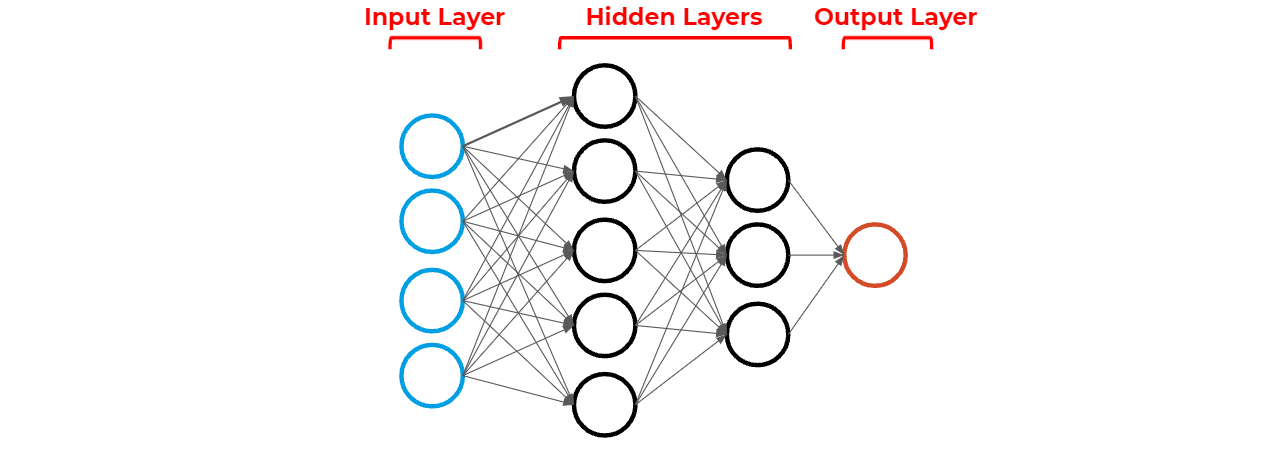

<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Steps.png
"> The code to translate that network is pretty simple. 
* You instantiate a sequential model (typically you call the object model), then with the attribute `.add()`, you add layers to your network.
* We will add `Dense()` layers, parsing the neurons (units), activation functions where needed. 
* The last action is to compile the model. In practical terms, that means defining the loss function and optimizer. The loss function depends on the ML task; in this case, we set `mse` (mean squared error) for the Regression task. The optimizer we will use in the course is `adam`.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Note we added an argument called `name`, so you can name your layer. 
* It is not mandatory to name/label your layer; it is up to you to do so or not in the course or over your career. We are doing this now just to explain the network summary and network plot.

model = Sequential() # instantiate a sequential model
model.add(Dense(units=4, activation='relu', input_shape=(4,), name='InputLayer'))  # input layer

model.add(Dense(units=5,activation='relu', name='1stHidden'))  # 1st hidden layer
model.add(Dense(units=3,activation='relu', name='2ndHidden'))  # 2nd hidden layer

model.add(Dense(units=1, name='OutputLayer')) # output layer
model.compile(loss='mse', optimizer='adam') # inform loss function and optimizer

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> You can check the model summary with `.summary()`
* Note that the network has in total 67 parameters. These parameters will be learned (calculated) over the training process.
* For a given `Dense()` layer, we calculate the number of parameters using the simple formula
  * **(Current_Layer_Neurons x Previous_Layer_Neurons) + (Current_Layer_Neurons)**

* Let's apply to our network layers
  * Input layer: ( 4 x 4 ) + 4  = 20    *(in this case, the previous layer neurons is the input shape, which is 4)*
  * 1st hidden layer: (5 x 4) + 5 = 25
  * 2nd hidden layer: (3 x 5) + 3 = 18
  * Output layer: (1 x 3) + 1 = 4

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note also the layer output shape - it is 1. And makes sense to our ML task objective which is Regression (predict a continuous number)

model.summary()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Alternatively, you can use a `plot_model()` function from `tensorflow.keras.utils` module to display the model data flow more visually.
* note again the input and output shape on each layer. That is how the data flows across your network.

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Warning, depending on how many layers your model has, the previous summary and the previous graph may look long and odd. <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png">

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> If you have a CNN (Convolutional Neural Network), you would arrange `Conv2D()`, which would have parameters to learn. 
* Let's assume a CNN, where the input is 32x32x3 (imagine an RGB image 32x32); with 2 convolutions (the first convolution has 16 filters and kernel 4x4; the second convolution has 32 filters and kernel 4x4).
* After the convolutions, we have a MaxPooling (2x2)
* Then we Flatten after the second convolution then chain a Dense layer (128 neurons). The output layer is sigmoid with 1 neuron (indicating it is a binary classification). 
* The model is compiled with `binary_crossentropy` as loss and `adam` as optimizer.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
#### 1st convolution and max pooling
model.add(Conv2D(filters=16, kernel_size=(4,4),input_shape=(32,32,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
####

#### 2nd convolution and max pooling
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
####

model.add(Flatten())
model.add(Dense(128, activation='relu'))

### output layer: it is a binary classification model? 
# why? activation function is sigmoid and loss is binary_crossentropy
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We can calculate the number of parameters in the convolution by **multiplying the width and height of the filter of the current layer and the last number of filters** (if it is the first convolution layer, you get the third dimension from the input shape). **We can add this product with 1 and multiply it with the number of filters**, so we can get the number of parameters. 

* Let's calculate for the convolutions
  * First convolution: (4 x 4 x 3 + 1 ) x 16 = 528
  * Second convolution: (4 x 4 x 16 + 1) x 32 = 8224

*  Max pooling has no learnable parameters since all it does is calculate a specific number

* Flatten converts the data to a 1D array for the next layer, therefore it doesn't have a learning parameter


* Let's calculate for the Dense layers (like we learned in the previous section)
  * (128 x 800) + 128 = 102528
  * (1 x 128) + 1 = 129


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In total, we have more than 111 thousand parameters that the network will learn. That is much more than the previous network. Reflect now on the amount of data (in this case images showing its features and patterns) you need to provide to such a network, so it can learn the relationships. 
* That is why you need a relevant amount of data when predicting images using CNNs.

model.summary()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Alternatively, you can use a `plot_model()` function from `tensorflow.keras.utils` module to display the model data flow more visually.
* Note again the image shape after each layer. **This is the dataflow from your image (in this case 32x32x3) to a prediction (0 or 1)!**

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Training Hyperparameters

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> When training a model in TensorFlow, it is advisable to scale your data (if your data is tabular or not) since experience shows that the model learns the relationships faster and better when the features are on a similar scale and typically in a range of -1 to +1. As a result, you should consider scaling your data before fitting a TensorFlow model.

<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> Let's start first with a definition of a sample which is a piece of data, like a row in a tabular data or an image 

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> There are a few hyperparameters we may parse when training neural networks.
* **Batch size**: a set of samples that you feed to the model when training.
  * The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model. A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update.
  * The batch size influences the training time. There is no rule of thumb as to which batch size would work best. You may try a few options and check performance. However, you should not use large batch sizes; it tends to overfit the model. Common batch sizes are 32, 64, 128, 256, 512, 1024, 2048. The default is 32.


* **Epoch**: It is an iteration over the entire data. 
  * In the training phase, the model will "see" (or iterate over) the data a certain number of times. This number of times is known as an epoch. The bigger the epoch is, the longer the training process. You may try an arbitrary number (the default is 1) and check the performance to decide if you need more.  We will also see a strategy to limit the epochs number.
  * This strategy is to use call back when training the model, which is executed at a specific moment when fitting a TensorFlow model, typically at the end of every epoch.
  * You will then use a function called early stopping. According to TensorFlow [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), early stopping allows stopping training when a monitored metric has stopped improving. This is useful to avoid overfitting the model to the data.


* **Steps per Epoch**: According to TensorFlow [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), it is the total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
  * Therefore, you can define how many batches of samples to use in one epoch; this is useful when you perform data augmentation when training, like loading data (i.e., image) on the fly to the memory to fit your model. We will cover that in the Walkthrough Project 01


---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Has the model learned properly?

<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Result.png
">
 When fitting an ML model you will be interested in analyzing the performance of the model over a validation set of data that the ML model has not seen at the time of training. 
* If we get the desired generalized performance,  we take these models further for the deployment, otherwise, we go for the optimization process.


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> You will probably remember from other modules that a model can underfit, overfit, or learn the patterns in the data correctly.
* When the model **underfits**, it means the performance on the train and test set is low; this is because the model didn't learn the patterns correctly.
* When the model **overfits**, it means the performance between the train set and another data (test set or actual data) will be different. That means the model can't generalize on unseen data
* When the model learns the patterns, the performance on the train and test sets are satisfactory and similar. That means the model can generalize on unseen data.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">  In TensorFlow, you can assess if the model learned right after it finished training. 
* The model will train over a given amount of epochs and the expectation is that the error will reduce over the epochs. You can access a **learning curve that shows the loss achieved by the model over the training and validation data per epoch**. 
* In other words, the plot shows how the model performed in training and validating the data.

<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Challenge%20test.png
"> There are 3 possibilities that you can identify in the learning curve: 
  * 1- the model learned normally,
  * 2 - the model overfitted or 
  * 3 - the model underfitted.


---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Normal Learning or Good fit

 <img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> If the model learned normally, the loss plots for training and validation data follow a similar path and are close to each other, like in the plot below. 
* Note the model trained for 20 epochs and the loss gradually decreased similarly  in the train (blue line) and validation data (orange line)

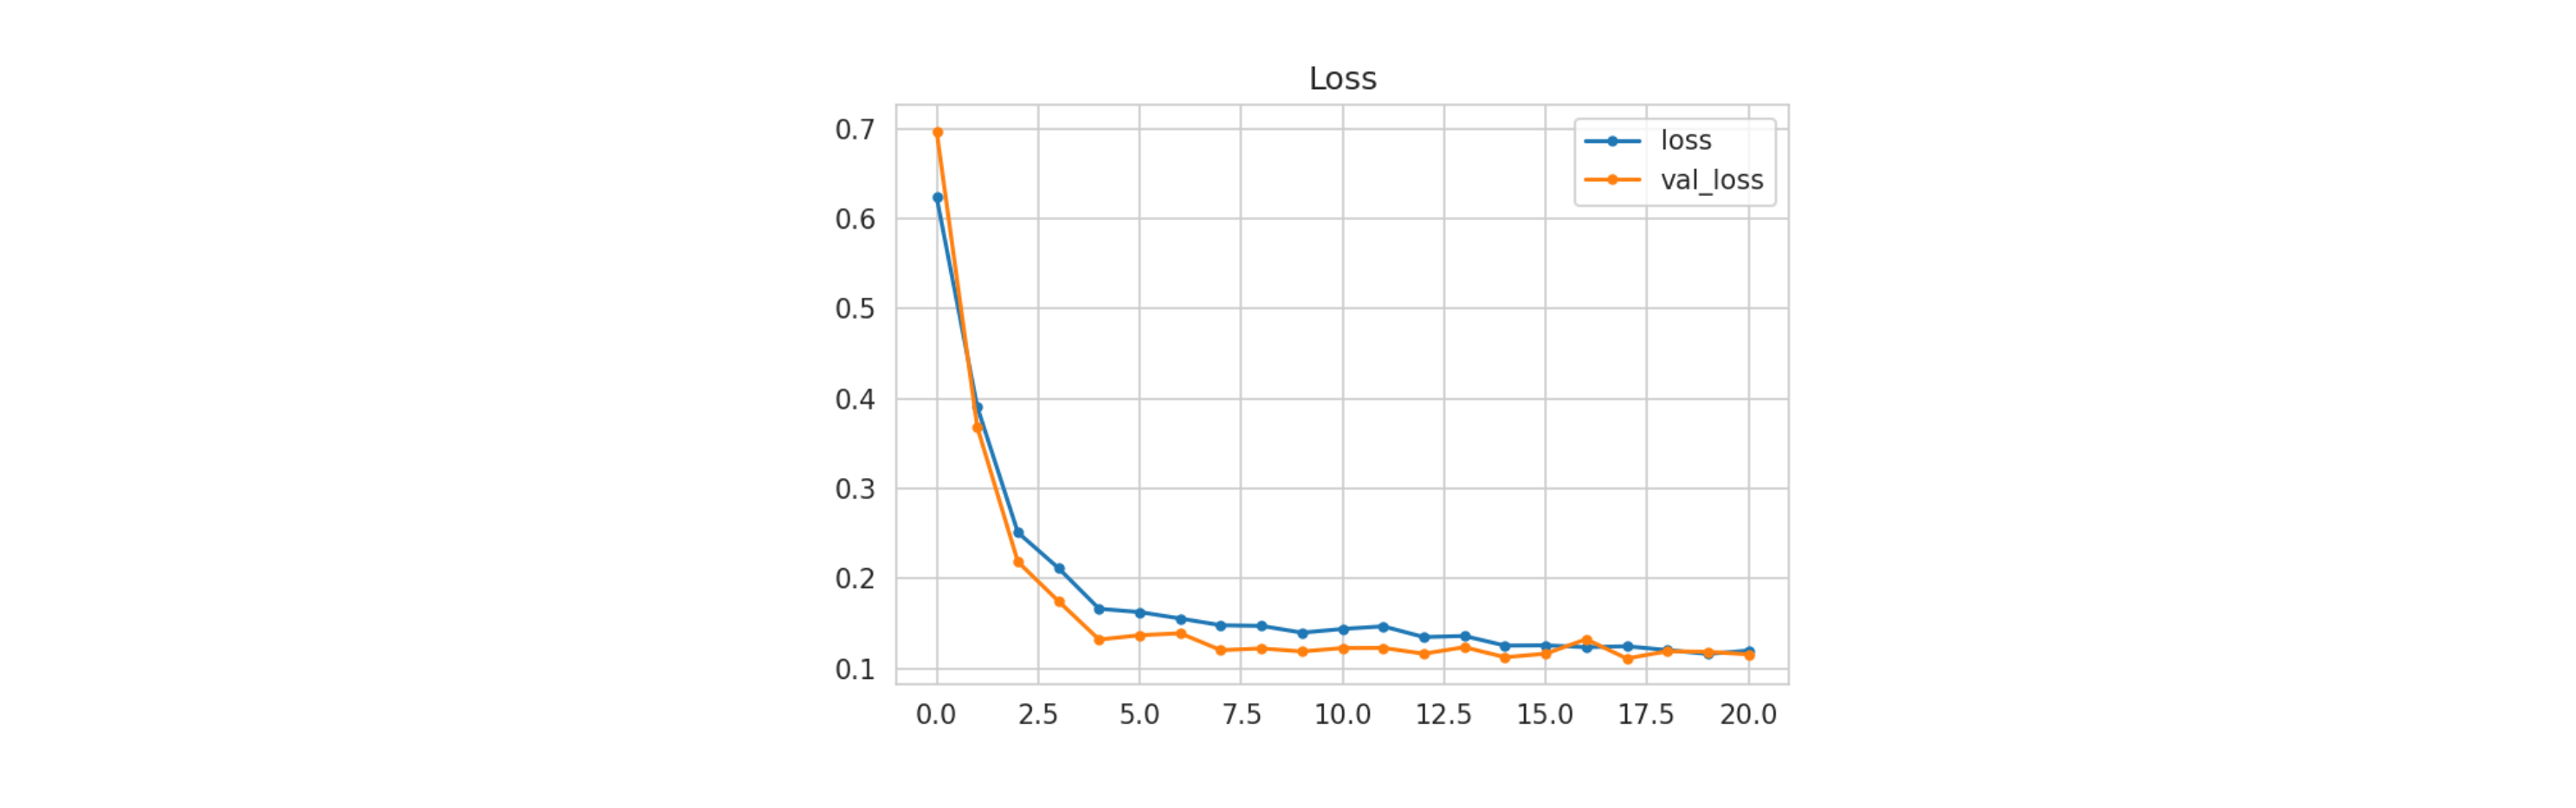

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Overfit

 <img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> If the model were overfitting, the learning curve would show the training loss decreasing and the validation loss shooting up, and it would not progress with the training loss. 
As a result, we would see a gap between the training and validation lines. 
* This is a standard behaviour when training deep learning models, and we can reduce it by tuning our model hyperparameters.

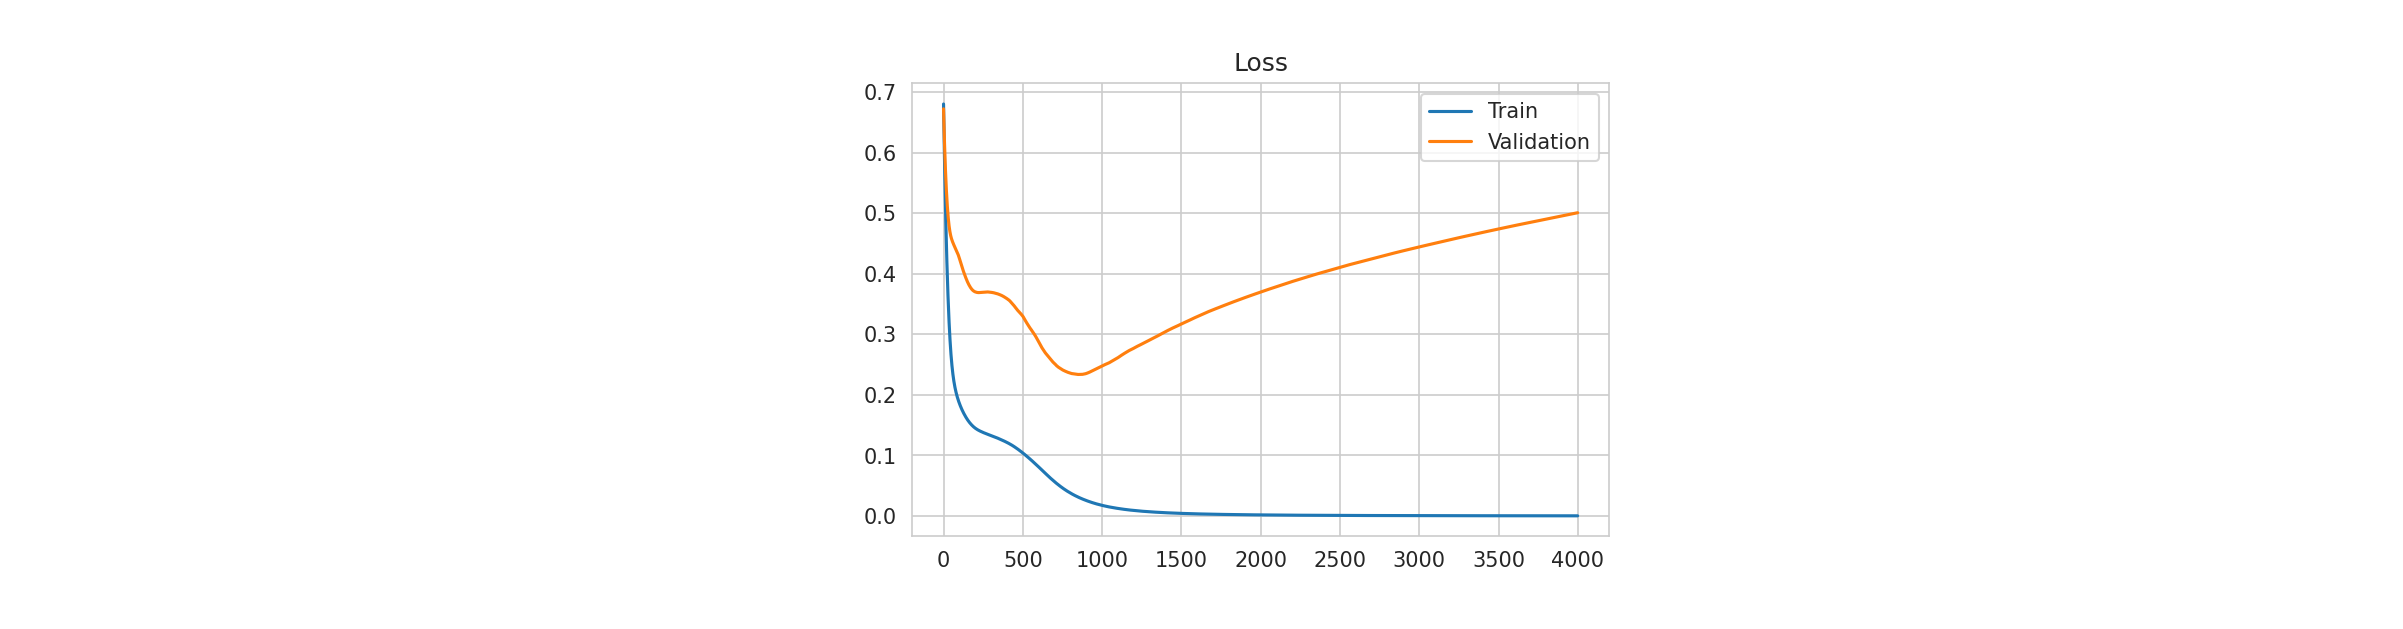

---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Underfit

 <img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Tips.png
"> On the other hand, an underfit model could be identified from the learning curve of the training loss. 
* It would either show a flat line or noisy values of relatively high loss, indicating that the model could not learn the training dataset at all. In addition, you will notice the lines haven't followed the same trajectory. In this example, the model trained for 100 epochs, and the loss decreased differently.


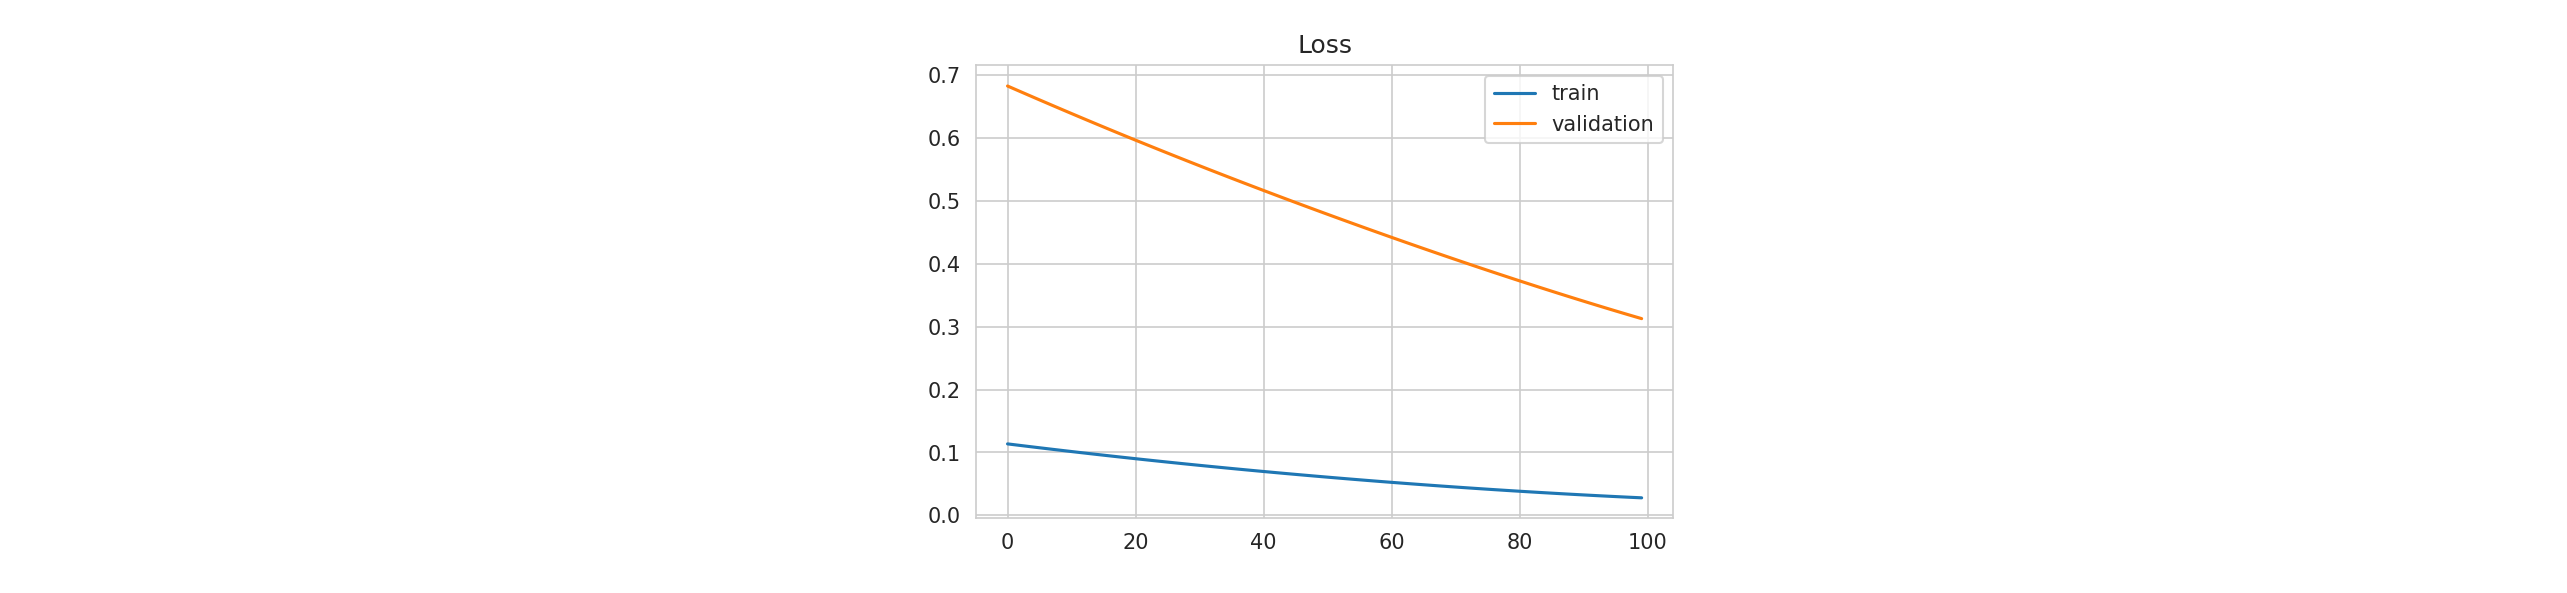

---